# Autonomous Vehicles Animal Detection 

In [6]:
import eda_batch
from logo import logo
import tarfile
import os
import numpy as np
from PIL import Image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
import plotly.graph_objects as go

In [2]:
logo()

# EDA

### Data extraction

In [3]:
file_path = 'cifar-10-python.tar.gz'

with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall()

Found batches, let's explore them

### Explore batches

Here I extract batches content removing its byte string being

In [37]:
batch = eda_batch.dict_batch_file('cifar-10-batches-py/test_batch')
print(batch)

{'batch_label': [116, 101, 115, 116, 105, 110, 103, 32, 98, 97, 116, 99, 104, 32, 49, 32, 111, 102, 32, 49], 'labels': [3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2, 6, 9

Ok, no byte strings anymore. Let's check each element

In [38]:
for k,v in batch.items():
    print(f"Key: {k}");
    print(v);
    print(f"Element length: {len(v)}")
    print("\n")

Key: batch_label
[116, 101, 115, 116, 105, 110, 103, 32, 98, 97, 116, 99, 104, 32, 49, 32, 111, 102, 32, 49]
Element length: 20


Key: labels
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9,

In [39]:
batch["data"][0].shape

(3072,)

We have 10k images with their names and labels, each image has 32x32x3 = 3072 features. Idk wthat is batch_label. Let's do it with al batches.

In [9]:
batches = {};

for filename in os.listdir("cifar-10-batches-py"):
    try:
        batch = eda_batch.dict_batch_file(os.path.join("cifar-10-batches-py",filename));
        print(filename+" Batched\n")
        batches[filename] = batch
    except:
        print(filename + " Unbatchable\n")

batches.meta Unbatchable

data_batch_1 Batched

data_batch_2 Batched

data_batch_3 Batched

data_batch_4 Batched

data_batch_5 Batched

readme.html Unbatchable

test_batch Batched



Just created a dict with all batches. Time to fit it with model input

# Preprocessing

Try printing an image

Image name leptodactylus_pentadactylus_s_000004.png
Image label 6


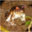

In [10]:
image = batches["data_batch_1"]["data"][0];
red = image[:1024].reshape(32,32);
green = image[1024:2048].reshape(32,32);
blue = image[2048:].reshape(32,32);

image_rgb = np.stack((red, green, blue), axis=-1) 

print("Image name "+batches["data_batch_1"]["filenames"][0])
print(f"Image label {batches["data_batch_1"]["labels"][0]}")
Image.fromarray(image_rgb)


Images will be submitted to a pipeline

### Set data in train validation and test folder

Create folders

In [16]:
folds = ["train","valid","test"];

for fol in folds:
    os.mkdir(fol)
    for c in np.arange(2):
        os.mkdir(fol+"/"+str(c))

In [17]:
for batch_name,batch in batches.items():
    for i in np.arange(10000):
        image = batch["data"][i]
        image = Image.fromarray(image)
        image.save(os.path.join("train/"+str(int(batch["labels"][i] in np.arange(2,8))), batch["filenames"][i]))
        print(batch_name+" "+str(i))

data_batch_1 0
data_batch_1 1
data_batch_1 2
data_batch_1 3
data_batch_1 4
data_batch_1 5
data_batch_1 6
data_batch_1 7
data_batch_1 8
data_batch_1 9
data_batch_1 10
data_batch_1 11
data_batch_1 12
data_batch_1 13
data_batch_1 14
data_batch_1 15
data_batch_1 16
data_batch_1 17
data_batch_1 18
data_batch_1 19
data_batch_1 20
data_batch_1 21
data_batch_1 22
data_batch_1 23
data_batch_1 24
data_batch_1 25
data_batch_1 26
data_batch_1 27
data_batch_1 28
data_batch_1 29
data_batch_1 30
data_batch_1 31
data_batch_1 32
data_batch_1 33
data_batch_1 34
data_batch_1 35
data_batch_1 36
data_batch_1 37
data_batch_1 38
data_batch_1 39
data_batch_1 40
data_batch_1 41
data_batch_1 42
data_batch_1 43
data_batch_1 44
data_batch_1 45
data_batch_1 46
data_batch_1 47
data_batch_1 48
data_batch_1 49
data_batch_1 50
data_batch_1 51
data_batch_1 52
data_batch_1 53
data_batch_1 54
data_batch_1 55
data_batch_1 56
data_batch_1 57
data_batch_1 58
data_batch_1 59
data_batch_1 60
data_batch_1 61
data_batch_1 62
da

This is how array image conversion works

In [55]:
batch["data"][i].shape == np.ravel(np.array(Image.fromarray(batch["data"][i]))).shape

True

### Set data into a compressed batch

In [57]:
labels = ['airplane','automobile','bird','cat','deer','dog',\
          'frog','horse','ship','truck']

In [61]:
test = {}
test["data"] = []
test["labels"] = []
for c in np.arange(10000):
    image = batches["test_batch"]["data"][c];
    red = image[:1024].reshape(32,32);
    green = image[1024:2048].reshape(32,32);
    blue = image[2048:].reshape(32,32);
    image_rgb = np.stack((red, green, blue), axis=-1) 

    test["data"].append(image_rgb)
    test["labels"].append(int(batches["test_batch"]["labels"][c] in np.arange(2,8)))

X_test = np.stack(test["data"],axis=0)
y_test = np.stack(test["labels"], axis=0)


train = {}
train["data"] = []
train["labels"] = []
i = 0
for batch_name,batch in batches.items():
    if batch_name == "test_batch":
        break
    else:
        for c in np.arange(10000):
            image = batch["data"][c];
            red = image[:1024].reshape(32,32);
            green = image[1024:2048].reshape(32,32);
            blue = image[2048:].reshape(32,32);
            image_rgb = np.stack((red, green, blue), axis=-1) 

            train["data"].append(image_rgb)
            train["labels"].append(int(batch["labels"][c] in np.arange(2,8)))
            i=i+1

X_train = np.stack(train["data"], axis=0)
y_train = np.stack(train["labels"], axis=0)

print(f"{X_train.shape},{X_test.shape},{y_train.shape},{y_test.shape}")

(50000, 32, 32, 3),(10000, 32, 32, 3),(50000,),(10000,)


### Pieplot target distribution

In [53]:
fig = go.Figure(data=[go.Pie(labels=["Animal", "Not animal"],
                             values=[np.mean(y_train), 1 - np.mean(y_train)],
                             hoverinfo="label+percent",  # Mostra etichetta, percentuale e valore
                             textinfo='percent',  # Mostra solo la percentuale sulle fette
                             
                             pull=[0, 0.01],  # Evidenzia la seconda fetta
                             marker=dict(colors=['#FF0000', '#408040']),  # Colori personalizzati
                             textfont=dict(size=18)
                             )])

# Imposta il layout
fig.update_layout(
    paper_bgcolor = "rgba(0,0,0,0)", 
    plot_bgcolor = "rgba(0,0,0,0)",
    title={
        'text': "Target distribution",  
        'font': {'color': 'white'} 
    },
    font=dict(
        color='white', 
        size=18
    ),  
    legend=dict(
        font=dict(color='white')
    )
)

# Mostra il grafico
fig.show()

Distribution is fairly balanced

### SKfold

In [ ]:
num_folds = 5

# Creare il generatore KFold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Inizializza una lista per salvare le performance di ogni fold
scores = []

for train_index, test_index in kf.split(X):
    # Suddividere i dati in set di addestramento e di test
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

### Data augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    'train',  # Path alla cartella con le immagini
    target_size=(150, 150),  # Ridimensiona le immagini
    batch_size=32,
    class_mode='binary'  # Modifica per la tua classificazione
)

model.fit(train_generator, epochs=10)

# Model

## Transfer Learning

Use pre-trained vgg16 model freezing its conv layers

In [55]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3),name="vgg16_mod")
vgg16 = Model(inputs=vgg16.inputs, outputs=vgg16.layers[-2].output)
vgg16.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

add dense layers by yourself

In [56]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import MaxPool2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.backend import clear_session
from tensorflow.keras.initializers import RandomNormal

In [170]:
VGG16().summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_28 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
w_init = RandomNormal(stddev=0.01)
x = vgg16.output
x = Flatten() (x)
x = Dropout(0.2) (x)
x = Dense(1024, activation='relu') (x)
x = Dropout(0.2) (x)
x = Dense(10, activation='softmax') (x)

In [58]:
model = Model(inputs=vgg16.input, outputs=x)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,823,114 (64.18 MB)

 Trainable params: 16,823,114 (64.18 MB)

 Non-trainable params: 0 (0.00 B)

## Training

In [59]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
%%time
n_epochs = 10
hist1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=n_epochs)

Epoch 1/10
 243/1563 ━━━━━━━━━━━━━━━━━━━━ 9:40 440ms/step - accuracy: 0.6199 - loss: 0.7522

KeyboardInterrupt: 

# Results

Let's send output on brower avoiding visualization issues on VSC

In [189]:
import plotly.io as pio

pio.renderers.default = 'browser'

fig.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Simuliamo alcune metriche di addestramento
epochs = np.arange(1, 21)
loss = np.random.uniform(0.2, 1.0, size=len(epochs))  # Loss simulata
accuracy = np.random.uniform(0.5, 1.0, size=len(epochs))  # Accuracy simulata
val_loss = np.random.uniform(0.3, 1.1, size=len(epochs))  # Val_loss simulata
val_accuracy = np.random.uniform(0.4, 1.0, size=len(epochs))  # Val_accuracy simulata

# Crea una figura Plotly
fig = go.Figure()

# Aggiungi i tracciati per ogni metrica
fig.add_trace(go.Scatter(x=epochs, y=loss, mode='lines', name='Loss', visible=True))
fig.add_trace(go.Scatter(x=epochs, y=accuracy, mode='lines', name='Accuracy', visible=False))
fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines', name='Val Loss', visible=False))
fig.add_trace(go.Scatter(x=epochs, y=val_accuracy, mode='lines', name='Val Accuracy', visible=False))

# Definisci il menu a tendina per cambiare la metrica visualizzata
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Loss",
                     method="update",
                     args=[{"visible": [True, False, False, False]},
                           {"title": "Training Loss"}]),
                dict(label="Accuracy",
                     method="update",
                     args=[{"visible": [False, True, False, False]},
                           {"title": "Training Accuracy"}]),
                dict(label="Val Loss",
                     method="update",
                     args=[{"visible": [False, False, True, False]},
                           {"title": "Validation Loss"}]),
                dict(label="Val Accuracy",
                     method="update",
                     args=[{"visible": [False, False, False, True]},
                           {"title": "Validation Accuracy"}])
            ]),
            direction="down",  # Direzione del menu
            showactive=True  # Mostra il pulsante selezionato
        )
    ]
)

# Aggiungi titolo e etichette agli assi
fig.update_layout(
    title="Metriche di Addestramento del Modello",
    xaxis_title="Epoche",
    yaxis_title="Valore",
    template="plotly_dark"  # Tema grafico
)

# Mostra il grafico
fig.show()
